# Introduction 


You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.

Note that many exercises are followed by a block with some `assert` statements. These assertions may be preceded by some setup code. They are provided to give you feedback that you are on the right path -- receiving an `AssertionError` probably means you've done something wrong.

## Official documentation for version used in this tutorial

https://networkx.org/

## Official tutorial for version used in this tutorial

https://networkx.org/documentation/stable/tutorial.html

# The `import` statement



Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load NetworkX, but give it a short alias `nx` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [ ]:
import networkx as nx
%matplotlib inline

Let's check the installed version of NetworkX. Version 2 is incompatible with v1, so we want to make sure we're not using an out of date package.

In [ ]:
nx.__version__

'2.5.1'

# Creating and drawing undirected graphs

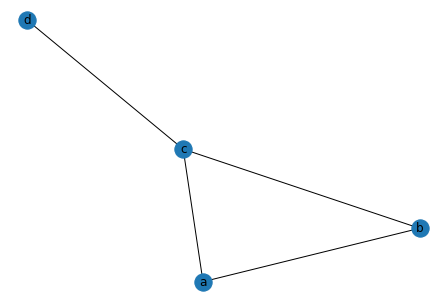

In [ ]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

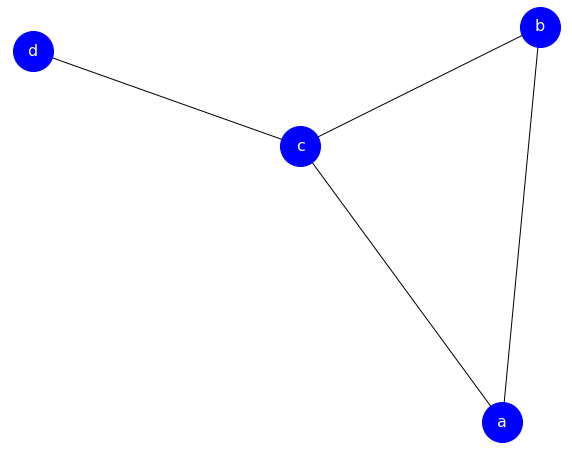

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,ax=ax
        )

# A note on naming conventions



Usually in Python, variables are named in `snake_case`, i.e. lowercase with underscores separating words. Classes are conventionally named in `CamelCase`, i.e. with the first letter of each word capitalized.

Obviously NetworkX doesn't use this convention, often using single capital letters for the names of graphs. This is an example of convention leaking from the world of discrete mathematics. Since most of the documentation you will find online uses this convention, we will follow it as well.

# Graph methods

The graph object has some properties and methods giving data about the whole graph.

In [ ]:
# List all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [ ]:
# List all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [ ]:
for node in G.nodes:
    print(node)

a
b
c
d


In [ ]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.

In [ ]:
G.number_of_nodes()

4

In [ ]:
G.number_of_edges()

4

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [ ]:
# list of neighbors of node 'b'
G.neighbors('b')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [ ]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


and you can always use the `list` constructor to make a list from an iterator:

In [ ]:
list(G.neighbors('b'))

['a', 'c']

# NetworkX functions vs. Graph methods



The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [ ]:
nx.is_tree(G)

False

In [ ]:
nx.is_connected(G)

True

# Node and edge existence



To check if a node is present in a graph, you can use the `has_node()` method:

In [ ]:
G.has_node('a')

True

In [ ]:
G.has_node('x')

False

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [ ]:
'd' in G.nodes

True

Likewise we can check if two nodes are connected by an edge:

In [ ]:
G.has_edge('a', 'b')

True

In [ ]:
G.has_edge('a', 'd')

False

In [ ]:
('c', 'd') in G.edges

True

# Node degree



One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [ ]:
len(list(G.neighbors('a')))

2

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [ ]:
G.degree('a')

2

# EXERCISE 1




Often in the context of trees, a node with degree 1 is called a *leaf*. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [ ]:
def get_leaves(G):
  # PUT YOUR CODE HERE

In [ ]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])
assert set(get_leaves(G)) == {'c', 'b'}

# Aside: comprehensions



Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first. List comprehensions and generator expressions are compact ways to do this.

List comprehensions are specified inside square brackets, and immediately produce a list of the result.

In [ ]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In the context of NetworkX, this is often used to do something with the node or edge lists:

In [ ]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'd', 'c']
[2, 1, 2, 1]


Generator expressions are slightly different as they are evaluated [lazily](https://en.wikipedia.org/wiki/Lazy_evaluation). These are specified using round braces, and if they are being expressed as a function argument, they can be specified without any braces. These are most often used in the context of aggregations like the `max` function:

In [ ]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [ ]:
max(len(item) for item in items)

6

In [ ]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

# Node names



The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

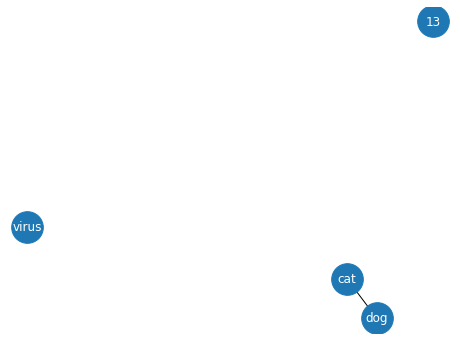

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,6))

G = nx.Graph()
G.add_nodes_from(['cat','dog','virus',13])
G.add_edge('cat','dog')
nx.draw(G, with_labels=True, font_color='white', node_size=1000, ax = ax)
plt.show()

# Adjacency lists



One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

There is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub, but here are its contents:

In [ ]:
print(open('friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.

In [ ]:
SG = nx.read_adjlist('friends.adjlist')

We know how to draw this graph:

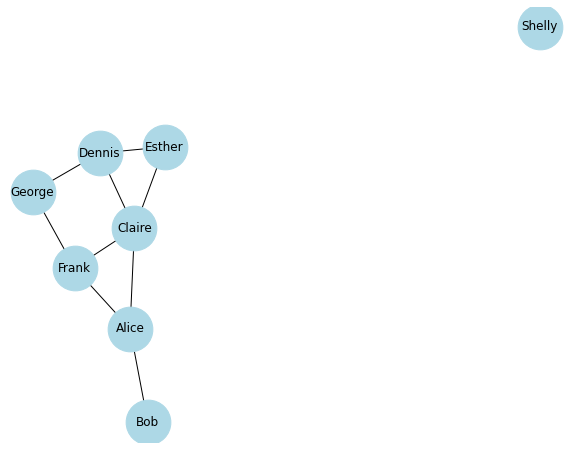

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(10,8))
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True,ax=ax)
plt.show()

And we know how to get information such as the number of friends linked from a node:

In [ ]:
SG.degree('Alice')

3

# EXERCISE 2



Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

In [ ]:
def max_degree(G):
    # PUT YOUR CODE HERE

In [ ]:
SG = nx.read_adjlist('friends.adjlist')
assert max_degree(SG) == ('Claire', 4)

# EXERCISE 3



Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

    mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in `SG` drawn above.

In [ ]:
def mutual_friends(G, node_1, node_2):
  # PUT YOUR CODE HERE

In [ ]:
SG = nx.read_adjlist('friends.adjlist')
assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
assert mutual_friends(SG, 'George', 'Bob') == []
assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']

# Directed graphs



Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

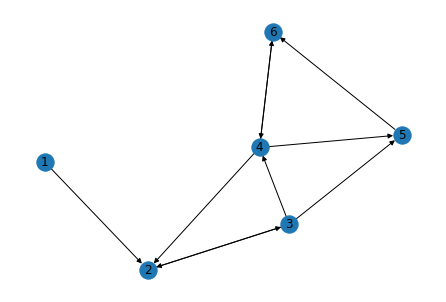

In [ ]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [ ]:
D.has_edge(1,2)

True

In [ ]:
D.has_edge(2,1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [ ]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [ ]:
D.in_degree(2)

3

In [ ]:
D.out_degree(2)

1

### Caveat

Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.

In [ ]:
D.degree(2)

4

In [ ]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]
